In [1]:
# 所用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# import seaborn as sns
from sklearn.linear_model import LogisticRegression
from typing import List
import math
import os
os.makedirs('result', exist_ok=True)

In [2]:
# 读入新冠数据
covid_df = pd.read_csv('china_provincedata1.csv' ,encoding='gbk')
covid_df.head()

,id,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,suspectedCount,suspectedCountIncr,provinceName,provinceShortName
0,1,5,5,0,0,5,5,20200120,0,0,0,0,北京市,北京
1,2,10,5,0,0,10,5,20200121,0,0,0,0,北京市,北京
2,3,14,4,0,0,14,4,20200122,0,0,0,0,北京市,北京
3,4,26,12,0,0,26,12,20200123,0,0,0,0,北京市,北京
4,5,36,10,0,0,36,10,20200124,0,0,0,0,北京市,北京


In [3]:
# 读入鸢尾花数据
iris_df = pd.read_csv('iris.csv' ,encoding='gbk', header=None)
# 重新设置数据列名
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']
iris_df = iris_df.drop(columns=['category'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 鸢尾花数据描述
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
# 新冠数据描述
covid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5534.0,2.767500e+03,1597.672526,1.0,1384.25,2767.5,4150.75,5534.0
confirmedCount,5534.0,2.183458e+03,10608.243347,1.0,120.25,254.0,712.75,68135.0
confirmedIncr,5534.0,1.540983e+01,243.365223,-5.0,0.00,0.0,1.00,14840.0
curedCount,5534.0,1.771602e+03,9086.809817,0.0,73.00,189.0,612.75,64435.0
curedIncr,5534.0,1.447452e+01,135.429860,-948.0,0.00,0.0,2.00,3203.0
currentConfirmedCount,5534.0,3.106753e+02,2928.117354,0.0,0.00,5.0,45.75,50633.0
currentConfirmedIncr,5534.0,9.541019e-02,247.195785,-2926.0,-1.00,0.0,0.00,13796.0
dateId,5534.0,2.020040e+07,155.821868,20200119.0,20200302.00,20200412.0,20200523.00,20200702.0
deadCount,5534.0,1.011807e+02,611.834674,0.0,0.00,2.0,6.00,4512.0
deadIncr,5534.0,8.398988e-01,18.776252,0.0,0.00,0.0,0.00,1290.0


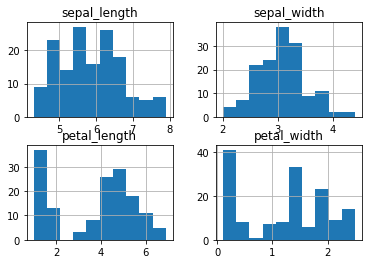

In [6]:
# 鸢尾花直方图
plt.show(iris_df.hist().data)

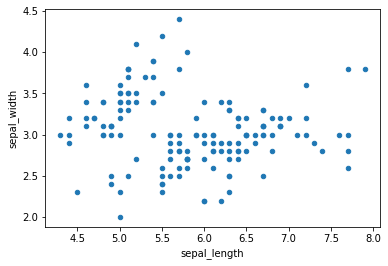

In [7]:
# 鸢尾花花萼散点图
iris_df.plot(x='sepal_length', y='sepal_width', kind='scatter')

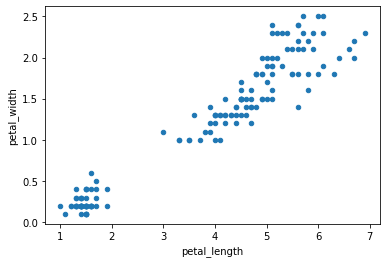

In [8]:
# 鸢尾花花瓣散点图
iris_df.plot(x='petal_length', y='petal_width', kind='scatter')

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

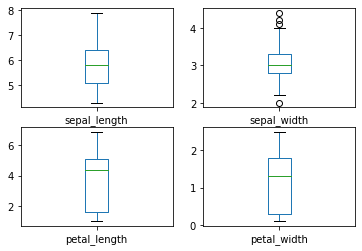

In [9]:
# 鸢尾花数据盒图
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

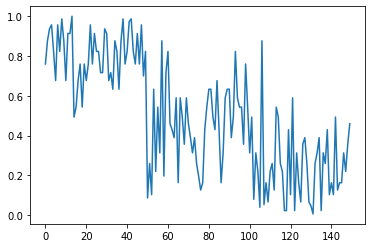

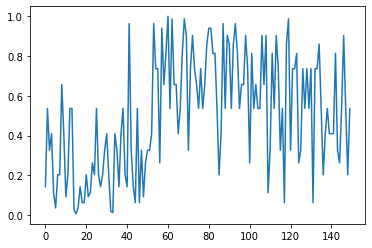

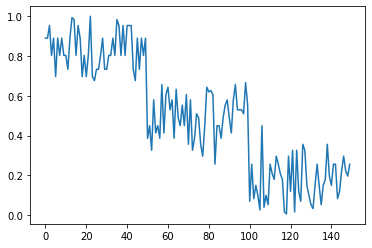

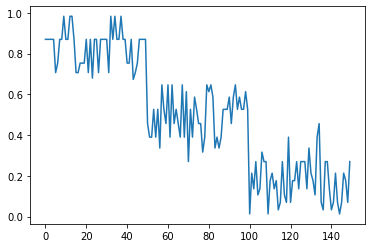

In [10]:
# 鸢尾花分位数图
for col in iris_df.columns:
    iris_df_quantile = iris_df[col].rank(pct=True, ascending=False)
    plt.show(iris_df_quantile.plot())

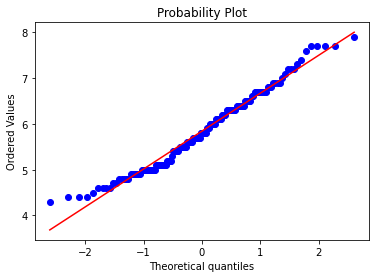

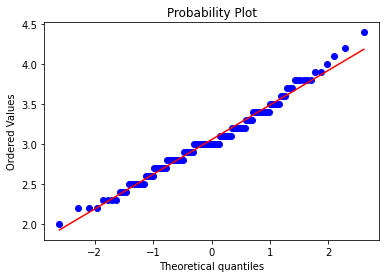

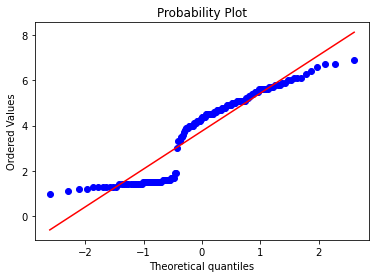

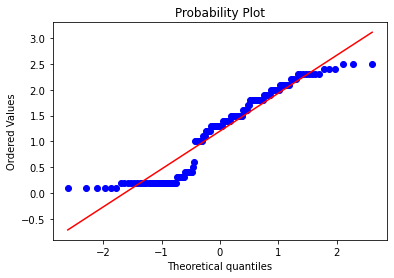

In [12]:
# 鸢尾花Q-Q图
for col in iris_df.columns:
    stats.probplot(iris_df[col], dist='norm', plot=plt)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B161F4940>,
      dtype=object)

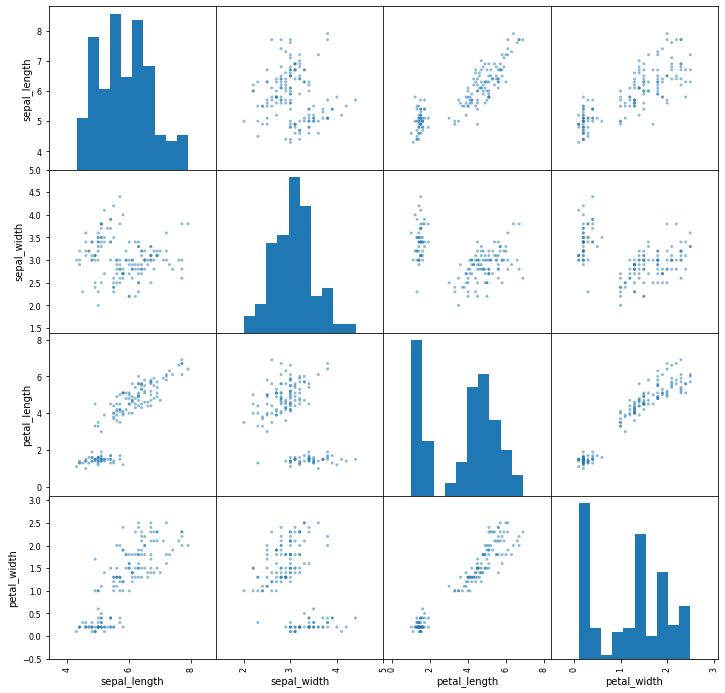

In [13]:
# 鸢尾花相关性分析
pd.plotting.scatter_matrix(iris_df, figsize=(12,12),range_padding=0.5)
# sns.pairplot(df)  

In [14]:
# 新冠回归预测
province = '山东'
province_df = covid_df[covid_df['provinceShortName']==province]
province_df = province_df.reset_index(drop=True)
province_df.head()

,id,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,suspectedCount,suspectedCountIncr,provinceName,provinceShortName
0,3758,9,9,0,0,9,9,20200123,0,0,0,0,山东省,山东
1,3759,21,12,0,0,21,12,20200124,0,0,0,0,山东省,山东
2,3760,39,18,0,0,39,18,20200125,0,0,0,0,山东省,山东
3,3761,63,24,0,0,63,24,20200126,0,0,0,0,山东省,山东
4,3762,87,24,0,0,87,24,20200127,0,0,0,0,山东省,山东


In [15]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
y = np.asarray(province_df['confirmedCount']).reshape(-1, 1)
X = np.asarray(range(0, len(y))).reshape(-1, 1)
X, y

(array([[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
        [ 

In [16]:
model.fit(X, y)
model.predict(np.array(range(162, 180)).reshape(-1, 1))

e:\anaconda\envs\pytorch160\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792], dtype=int64)